# Environment Preparation

In [ ]:
import torch

# Try to find and run nvidia-smi
# This command might not be directly in PATH in some Colab environments
nvidia_smi_path = !which nvidia-smi
if nvidia_smi_path:
    print(f"nvidia-smi found at: {nvidia_smi_path[0]}")
    !{nvidia_smi_path[0]}
else:
    print("nvidia-smi command not found in PATH, but GPU may still be available.")
    print("Checking GPU availability using PyTorch...")

# More reliable check for GPU availability using PyTorch
if torch.cuda.is_available():
    print(f"\nGPU is available! Device name: {torch.cuda.get_device_name(0)}")
else:
    print("\nGPU is NOT available. Please check your Colab runtime type (Runtime -> Change runtime type).")

nvidia-smi found at: /opt/bin/nvidia-smi
Sat Nov 29 10:26:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+------

In [ ]:
HOME = '/content'

%cd {HOME}

/content


In [ ]:
from IPython.display import clear_output
from IPython.display import display, Image
from IPython.display import Image
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [ ]:
!pip install ultralytics
clear_output()

from ultralytics import YOLO
!yolo checks

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   38.8/112.6 GB
CPU                    Intel Xeon CPU @ 2.00GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.2.6>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-python          ✅ 4.12.0.88>=4.6.0
pillow                 ✅ 11.3.0>=7.1.2
pyyaml                 ✅ 6.0.3>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.16.3>=1.4.1
torch                  ✅ 2.9.0+cu126>=1.8.0
torch                  ✅ 2.9.0+cu126!=2.4.0,>=1.8.0; sys_platform == "win32"


In [ ]:
%pip uninstall numpy -y
%pip install numpy # This will install the latest numpy version (likely 2.x)
%pip install pandas --upgrade # Ensure pandas is compatible with the new numpy

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.5 whi

In [ ]:
!pip install gdown
!gdown "https://drive.google.com/uc?export=download&id=1BIkQhW1Ws7pYFDikTjzHZsk1tKTb7gWL" -O ffb-dataset.zip
!mkdir -p ffb
!unzip ffb-dataset.zip -d ffb
!rm ffb-dataset.zip

clear_output()
print("Dataset telah terdownload.")

Dataset telah terdownload.


# Data Understanding

In [ ]:
dataset = f'{HOME}/ffb'

!echo "Number of images in train:"
!ls -1 {dataset}/train/images | wc -l

!echo -e "\nNumber of images in validation:"
!ls -1 {dataset}/valid/images | wc -l

!echo -e "\nNumber of images in test:"
!ls -1 {dataset}/test/images | wc -l

Number of images in train:
202

Number of images in validation:
57

Number of images in test:
28


In [ ]:
train_count = 202
validation_count = 57
test_count = 28

total_count = train_count + validation_count + test_count

train_percentage = (train_count / total_count) * 100
validation_percentage = (validation_count / total_count) * 100
test_percentage = (test_count / total_count) * 100

print(f"Train split: {train_percentage:.2f}%")
print(f"Validation split: {validation_percentage:.2f}%")
print(f"Test split: {test_percentage:.2f}%")

Train split: 70.38%
Validation split: 19.86%
Test split: 9.76%


In [ ]:
train_images_path = os.path.join(dataset, 'train/images/')

first_image_name = os.listdir(train_images_path)[0]
first_image_path = os.path.join(train_images_path, first_image_name)

with Image.open(first_image_path) as img:
    width, height = img.size
    print(f"The first image '{first_image_name}' has dimensions: {width}x{height} pixels")

The first image 'DJI_20250419142526_0420_D_MP4-0010_jpg.rf.b69c72cdb72fe46dfdeb11cebb241284.jpg' has dimensions: 1920x1080 pixels


In [ ]:
import os
import yaml
import random
import matplotlib.pyplot as plt
from PIL import Image

with open(os.path.join(dataset, 'data.yaml'), 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']
num_classes = data_yaml['nc']
print(f"Dataset has {num_classes} classes: {class_names}")

# Find a UNIQUE image for each class
class_image_map = {}
used_images = set()

labels_path = os.path.join(dataset, 'train/labels/')
label_files = os.listdir(labels_path)
random.shuffle(label_files)

for label_file in label_files:
    if len(class_image_map) == num_classes:
        break

    image_name = label_file.replace('.txt', '.jpg')

    if image_name in used_images:
        continue

    with open(os.path.join(labels_path, label_file), 'r') as f:
        for line in f:
            class_id = int(line.split()[0])

            if class_id not in class_image_map:
                class_image_map[class_id] = image_name
                used_images.add(image_name)
                break

if not class_image_map:
    print("\nCould not find any labeled images to display.")
else:
    print(f"\nDisplaying one unique image for each of the {len(class_image_map)} found classes...")

    fig, axs = plt.subplots(1, len(class_image_map), figsize=(15, 5))

    if len(class_image_map) == 1:
        axs = [axs]

    for i, (class_id, image_name) in enumerate(sorted(class_image_map.items())):
        image_path = os.path.join(dataset, 'train/images/', image_name)
        try:
            image = Image.open(image_path)
            ax = axs[i]
            ax.imshow(image)
            ax.set_title(f"Class: {class_names[class_id]}")
            ax.axis('off')
        except FileNotFoundError:
            print(f"Warning: Could not find image '{image_name}' for class '{class_names[class_id]}'")

    plt.tight_layout()
    plt.show()

Dataset has 4 classes: ['Buah belum matang', 'Buah busuk', 'Buah matang', 'Buah mau matang']

Displaying one unique image for each of the 4 found classes...


In [ ]:
with open(os.path.join(dataset, 'data.yaml'), 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']
num_classes = len(class_names)

class_counts = {name: 0 for name in class_names}

labels_path = os.path.join(dataset, 'train/labels/')

for filename in os.listdir(labels_path):
    with open(os.path.join(labels_path, filename), 'r') as f:
        for line in f:
            class_id = int(line.split()[0])
            class_name = class_names[class_id]
            class_counts[class_name] += 1

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution of Labeled Objects')
plt.xlabel('Class Name')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Instance counts per class:")
for name, count in class_counts.items():
    print(f"- {name}: {count}")

Instance counts per class:
- Buah belum matang: 445
- Buah busuk: 53
- Buah matang: 84
- Buah mau matang: 67


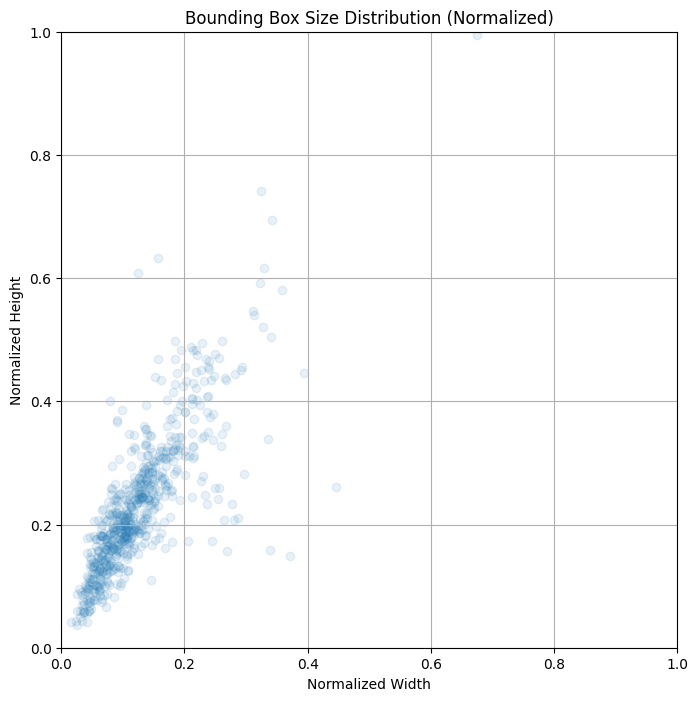

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

labels_path = os.path.join(dataset, 'train/labels/')
box_sizes = []

for filename in os.listdir(labels_path):
    with open(os.path.join(labels_path, filename), 'r') as f:
        for line in f:
            parts = line.split()
            width = float(parts[3])
            height = float(parts[4])
            box_sizes.append([width, height])

box_sizes = np.array(box_sizes)

plt.figure(figsize=(8, 8))
plt.scatter(box_sizes[:, 0], box_sizes[:, 1], alpha=0.1)
plt.title('Bounding Box Size Distribution (Normalized)')
plt.xlabel('Normalized Width')
plt.ylabel('Normalized Height')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

# Modelling

In [ ]:
# !yolo task=detect mode=train \
#       model=yolo12s.pt \
#       data={dataset}/data.yaml \
#       epochs=100 \
#       patience=20 \
#       batch=32 \
#       name='yolo12s_100epochs_20patience_dataset-asli'

In [ ]:
!pip install ray[tune]
from IPython.display import clear_output
clear_output()

In [ ]:
import os
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.hyperopt import HyperOptSearch

# Initialize Ray if not already initialized
if not ray.is_initialized():
    ray.init(ignore_reinit_error=True)

2025-11-29 10:29:02,408	INFO worker.py:2023 -- Started a local Ray instance.


In [ ]:
import pandas as pd
import os
import ray
from ray import tune

def trainable_yolo(config, checkpoint_dir=None):
    # Access hyperparameters from config
    epochs = config["epochs"]
    batch = config["batch"]
    patience = config["patience"]
    lr0 = config["lr0"]
    imgsz = config["imgsz"]
    optimizer = config["optimizer"]
    momentum = config["momentum"]

    # Define the output directory for this trial
    trial_name = ray.tune.get_context().get_trial_dir().split('/')[-1]
    # Construct the run name that Ultralytics will use
    ultralytics_run_name = f'yolo_raytune_{trial_name}'
    output_dir = os.path.join(HOME, 'runs/detect', ultralytics_run_name)

    # Run YOLO training command within the trainable function
    command = (
        f"yolo task=detect mode=train "
        f"model=yolo12s.pt "
        f"data={HOME}/ffb/data.yaml "
        f"epochs={epochs} "
        f"patience={patience} "
        f"batch={batch} "
        f"lr0={lr0} "
        f"imgsz={imgsz} "
        f"optimizer={optimizer} "
        f"momentum={momentum} "
        f"name='{ultralytics_run_name}' " # Use the constructed run name here
        f"project='{os.path.join(HOME, 'runs/detect')}' "
        f"exist_ok=True "
    )
    os.system(command)

    # After training, load the metrics from results.csv
    results_path = os.path.join(output_dir, 'results.csv')
    actual_mAP50 = 0.0 # Default value if parsing fails
    actual_precision = 0.0
    actual_recall = 0.0
    actual_f1_score = 0.0

    if os.path.exists(results_path):
        try:
            # Read CSV assuming the first line is a comment to be skipped (skiprows=1),
            # and that there are no explicit headers to be identified by pandas (header=None).
            # We will access columns by their numerical index.
            df_results = pd.read_csv(results_path, skipinitialspace=True, skiprows=1, header=None)

            # Based on Ultralytics results.csv structure (after skipping comments):
            # precision is typically the 5th column (index 4)
            # recall is typically the 6th column (index 5)
            # mAP50 is typically the 7th column (index 6)
            precision_column_index = 4
            recall_column_index = 5
            mAP50_column_index = 6

            if len(df_results.columns) > mAP50_column_index:
                # Get the value from the last row (most recent epoch) and the respective columns.
                actual_precision = df_results.iloc[-1, precision_column_index]
                actual_recall = df_results.iloc[-1, recall_column_index]
                actual_mAP50 = df_results.iloc[-1, mAP50_column_index]

                # Calculate F1-score
                if actual_precision + actual_recall > 0:
                    actual_f1_score = 2 * (actual_precision * actual_recall) / (actual_precision + actual_recall)
                else:
                    actual_f1_score = 0.0
            else:
                print(f"Warning: Not enough columns in {results_path} to find precision, recall, or mAP50. DataFrame columns: {df_results.columns.tolist()}")

        except Exception as e:
            print(f"Error reading results.csv for trial {ultralytics_run_name}: {e}")
    else:
        print(f"Warning: results.csv not found for trial {ultralytics_run_name} at {results_path}")

    tune.report({'mAP50': actual_mAP50, 'precision': actual_precision, 'recall': actual_recall, 'f1_score': actual_f1_score})


In [ ]:
search_space = {
    "epochs": 50, # Keep fixed for now as per previous discussion
    "batch": tune.choice([16, 32]), # Reduced max batch size to mitigate OOM
    "patience": tune.choice([10, 20, 30]),
    "lr0": tune.loguniform(1e-4, 1e-2), # Initial learning rate
    "imgsz": tune.choice([320, 640]), # Reduced max image size to mitigate OOM
    "optimizer": tune.choice(['SGD', 'AdamW', 'RMSProp']), # New hyperparameter: optimizer type
    "momentum": tune.uniform(0.8, 0.98) # New hyperparameter: momentum for optimizers
}

# Also update the Ray Tune run configuration
# 3. Configure the scheduler and search algorithm
scheduler = ASHAScheduler(
    metric="mAP50",
    mode="max",
    max_t=50, # Changed to 50 to match epochs
    grace_period=1,
    reduction_factor=2
)

# HyperOptSearch uses tree-structured Parzen estimators (TPE)
# You can also use BasicVariantGenerator or other algorithms
search_alg = HyperOptSearch(metric="mAP50", mode="max")

# 4. Run the hyperparameter tuning
analysis = tune.run(
    trainable_yolo,
    config=search_space,
    num_samples=10,  # Increased num_samples for more thorough search
    scheduler=scheduler,
    search_alg=search_alg,
    resources_per_trial={"gpu": 1}, # Allocate 1 GPU per trial
    name="yolo_hyperparam_tuning_expanded", # New name for the experiment
    storage_path=os.path.join(HOME, "ray_results"), # Changed local_dir to storage_path
    verbose=1, # Change to 2 for more detailed output
)

# Get the best trial
best_trial = analysis.get_best_trial(metric="mAP50", mode="max")

# Print the best hyperparameters and the corresponding metric
print("Best hyperparameters found were: ", best_trial.config)
print("Best mAP50 achieved: ", best_trial.last_result["mAP50"])

+--------------------------------------------------------------------+
| Configuration for experiment     yolo_hyperparam_tuning_expanded   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        AsyncHyperBandScheduler           |
| Number of trials                 10                                |
+--------------------------------------------------------------------+

View detailed results here: /content/ray_results/yolo_hyperparam_tuning_expanded
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-11-29_10-28-57_633871_4206/artifacts/2025-11-29_10-33-08/yolo_hyperparam_tuning_expanded/driver_artifacts`

Trial status: 1 PENDING
Current time: 2025-11-29 10:33:08. Total running time: 0s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------

(trainable_yolo pid=6452) [2025-11-29 10:33:41,830 E 6452 6488] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


(trainable_yolo pid=6452) optimizer: RMSprop(lr=0.003589620936389244, momentum=0.8235785803562556) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
(trainable_yolo pid=6452) Image sizes 640 train, 640 val
(trainable_yolo pid=6452) Using 2 dataloader workers
(trainable_yolo pid=6452) Logging results to /content/runs/detect/yolo_raytune_trainable_yolo_82586f56_1_batch=16,epochs=50,imgsz=640,lr0=0.0036,momentum=0.8236,optimizer=RMSProp,patience=20_2025-11-29_10-33-08
(trainable_yolo pid=6452) Starting training for 50 epochs...
(trainable_yolo pid=6452) 
(trainable_yolo pid=6452)       Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50      5.85G      1.851      5.654      1.798        102        640: 0% ──────────── 0/13  9.4s
       1/50      5.85G      2.125       5.53      1.969        137        640: 8% ╸─────────── 1/13 1.7s/it 9.9s<20.5s
       1/50      5.85G       2.11      5.581      1.993         98      

(trainable_yolo pid=8510) [2025-11-29 10:41:13,472 E 8510 8550] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      5.84G      2.125       5.53      1.969        137        640: 8% ╸─────────── 1/13 1.9s/it 9.3s<22.8s
       1/50      5.84G       2.11      5.581      1.993         98        640: 15% ━╸────────── 2/13 1.2s/it 9.9s<12.8s
       1/50      5.84G      2.129      5.631      2.061         92        640: 23% ━━╸───────── 3/13 1.1it/s 10.5s<9.2s
       1/50      5.84G      2.075       5.53      2.012        110        640: 31% ━━━╸──────── 4/13 1.4it/s 11.0s<6.3s
       1/50      5.84G      2.087      5.514      2.042        117        640: 38% ━━━━╸─────── 5/13 1.7it/s 11.4s<4.8s
       1/50       5.9G      2.074      5.452      2.028        118        640: 46% ━━━━━╸────── 6/13 1.7it/s 11.9s<4.0s
       1/50       5.9G      2.041      5.293      1.978        103        640: 54% ━━━━━━────── 7/13 1.8it/s 12.5s<3.4s
       1/50       5.9G      2.003      5.054      1.922         91        640: 62% ━━━━━━━───── 8/13 1.9it/s 13.0s<2.7s
       1/50       5.9G      1.955      4.

(trainable_yolo pid=10101) [2025-11-29 10:47:03,149 E 10101 10139] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      11.5G      2.056       5.52      1.957        211        640: 0% ──────────── 0/7  9.5s
Trial status: 2 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-11-29 10:47:09. Total running time: 14min 1s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         batch     patience          lr0     imgsz   optimizer       momentum     iter     total time (s)     mAP50     precision     recall     f1_score |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| trainable_yolo_3d0c6f53   RUNNING           32           10   0.00147273       640   AdamW           0.843492                        

(trainable_yolo pid=12106) [2025-11-29 10:54:30,636 E 12106 12145] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      5.84G      2.129      5.631      2.061         92        640: 23% ━━╸───────── 3/13 1.1it/s 10.8s<9.0s
       1/50      5.84G      2.075       5.53      2.012        110        640: 31% ━━━╸──────── 4/13 1.4it/s 11.2s<6.3s
       1/50      5.84G      2.087      5.514      2.042        117        640: 38% ━━━━╸─────── 5/13 1.7it/s 11.7s<4.8s
       1/50      5.88G      2.074      5.452      2.028        118        640: 46% ━━━━━╸────── 6/13 1.8it/s 12.2s<3.9s
       1/50      5.88G       2.09      5.457      2.035        103        640: 54% ━━━━━━────── 7/13 1.9it/s 12.6s<3.1s
       1/50      5.88G      2.094      5.513      2.036         91        640: 62% ━━━━━━━───── 8/13 2.0it/s 13.1s<2.5s
       1/50      5.88G      2.072      5.477       2.03         93        640: 69% ━━━━━━━━──── 9/13 2.1it/s 13.5s<1.9s
       1/50      5.88G       2.07      5.475      2.024         85        640: 77% ━━━━━━━━━─── 10/13 2.1it/s 13.9s<1.4s
       1/50      5.88G      2.079      

(trainable_yolo pid=13411) [2025-11-29 10:59:15,705 E 13411 13445] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      11.5G      2.056       5.52      1.957        211        640: 0% ──────────── 0/7  11.7s
       1/50      11.5G      2.051      5.589      1.983        192        640: 14% ━╸────────── 1/7 3.2s/it 12.7s<19.0s
       1/50      11.5G       2.01      5.471      1.951        231        640: 29% ━━━───────── 2/7 2.1s/it 13.8s<10.3s
       1/50      11.5G      2.023      5.473      1.992        205        640: 43% ━━━━━─────── 3/7 1.6s/it 14.8s<6.2s
       1/50      11.5G      2.051      5.548      1.999        204        640: 57% ━━━━━━╸───── 4/7 1.3s/it 15.7s<3.8s
       1/50      11.5G      2.047      5.566       2.01        180        640: 71% ━━━━━━━━╸─── 5/7 1.1s/it 16.5s<2.2s
       1/50      11.5G      2.055      5.678      2.001         46        640: 100% ━━━━━━━━━━━━ 7/7 3.6s/it 25.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.1s/it 3.1s
(trainable_yolo pid=13411)                    all        

(trainable_yolo pid=14882) [2025-11-29 11:04:39,728 E 14882 14918] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      2.44G      2.598      4.693      2.054        211        320: 0% ──────────── 0/7  6.5s
       1/50      2.44G      2.503      4.768      2.011        191        320: 14% ━╸────────── 1/7 1.5s/it 6.9s<8.8s
       1/50      2.44G      2.508      4.768      1.974        231        320: 29% ━━━───────── 2/7 1.1it/s 7.4s<4.6s
       1/50      2.44G      2.488      4.749      1.984        204        320: 43% ━━━━━─────── 3/7 1.5it/s 7.8s<2.7s
       1/50      2.44G       2.47      4.734      1.972        202        320: 57% ━━━━━━╸───── 4/7 1.9it/s 8.2s<1.6s
Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-11-29 11:04:41. Total running time: 31min 33s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status       

(trainable_yolo pid=15875) [2025-11-29 11:08:08,789 E 15875 15909] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


Trial status: 6 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-11-29 11:08:12. Total running time: 35min 3s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         batch     patience           lr0     imgsz   optimizer       momentum     iter     total time (s)     mAP50     precision     recall     f1_score |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| trainable_yolo_1faf249b   RUNNING           16           10   0.000449334       320   AdamW           0.833614                                                                             |
| trainable_yolo_82586f56   TERMINATED        

(trainable_yolo pid=17238) [2025-11-29 11:13:03,833 E 17238 17271] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      11.5G      2.056       5.52      1.957        211        640: 0% ──────────── 0/7  10.7s
       1/50      11.5G      2.051      5.589      1.983        192        640: 14% ━╸────────── 1/7 2.9s/it 11.6s<17.5s
       1/50      11.5G       2.01      5.471      1.951        231        640: 29% ━━━───────── 2/7 1.9s/it 12.6s<9.3s
Trial status: 7 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2025-11-29 11:13:12. Total running time: 40min 4s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         batch     patience           lr0     imgsz   optimizer       momentum     iter     total time (s)     mAP50     precision     recall     f1_score |
+----------------------------------------------------------------------------------

(trainable_yolo pid=18666) [2025-11-29 11:18:18,533 E 18666 18714] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      2.44G      2.503      4.768      2.011        191        320: 14% ━╸────────── 1/7 1.5s/it 8.0s<9.2s
       1/50      2.44G      2.508      4.768      1.974        231        320: 29% ━━━───────── 2/7 1.2it/s 8.4s<4.2s
       1/50      2.44G      2.488      4.749      1.984        204        320: 43% ━━━━━─────── 3/7 1.5it/s 8.8s<2.6s
       1/50      2.44G       2.47      4.734      1.972        202        320: 57% ━━━━━━╸───── 4/7 2.0it/s 9.2s<1.5s
       1/50      2.44G      2.475      4.726      1.976        180        320: 71% ━━━━━━━━╸─── 5/7 2.6it/s 9.4s<0.8s
       1/50      2.57G      2.458      4.791      1.984         46        320: 100% ━━━━━━━━━━━━ 7/7 2.4s/it 16.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.6s/it 3.6s
(trainable_yolo pid=18666)                    all         57        166    0.00267      0.208    0.00227    0.00104
(trainable_yolo pid=18666) 
(trainable_yolo pid=18666)

(trainable_yolo pid=19408) [2025-11-29 11:20:51,538 E 19408 19452] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


       1/50      11.5G      2.056       5.52      1.957        211        640: 0% ──────────── 0/7  11.0s
       1/50      11.5G      2.051      5.589      1.983        192        640: 14% ━╸────────── 1/7 3.0s/it 11.9s<18.0s
       1/50      11.5G       2.01      5.471      1.951        231        640: 29% ━━━───────── 2/7 1.9s/it 12.9s<9.5s
       1/50      11.5G      2.023      5.473      1.992        205        640: 43% ━━━━━─────── 3/7 1.6s/it 14.0s<6.3s
       1/50      11.5G      2.051      5.548      1.999        204        640: 57% ━━━━━━╸───── 4/7 1.4s/it 15.1s<4.2s
       1/50      11.5G      2.047      5.566       2.01        180        640: 71% ━━━━━━━━╸─── 5/7 1.3s/it 16.2s<2.5s
       1/50      11.5G      2.055      5.678      2.001         46        640: 100% ━━━━━━━━━━━━ 7/7 3.5s/it 24.2s
Trial status: 9 TERMINATED | 1 RUNNING
Current time: 2025-11-29 11:21:13. Total running time: 48min 5s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----

2025-11-29 11:27:39,962	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/ray_results/yolo_hyperparam_tuning_expanded' in 0.0105s.



Trial trainable_yolo_2f36c077 completed after 1 iterations at 2025-11-29 11:27:39. Total running time: 54min 31s
+--------------------------------------------------+
| Trial trainable_yolo_2f36c077 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         437.337 |
| time_total_s                             437.337 |
| training_iteration                             1 |
| f1_score                                 0.55825 |
| mAP50                                    0.37025 |
| precision                                1.41361 |
| recall                                    0.3478 |
+--------------------------------------------------+

Trial status: 10 TERMINATED
Current time: 2025-11-29 11:27:39. Total running time: 54min 31s
Logical resource usage: 0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------

In [ ]:
# Optional: Get the best trial's directory and load the best model
# best_trial = analysis.get_best_trial("mAP50", "max")
# best_model_path = os.path.join(best_trial.checkpoint.value, 'weights', 'best.pt')
# print(f"Path to best model: {best_model_path}")

# To integrate with your existing evaluation, you would then use `best_model_path`
# for the evaluation step instead of the fixed `YOLO_dir`.


# Evaluation

In [ ]:
import os

all_yolo_runs_dir = os.path.join(HOME, 'runs/detect')
print(f'Listing contents of: {all_yolo_runs_dir}')
!ls -F {all_yolo_runs_dir}

Listing contents of: /content/runs/detect
'yolo_raytune_trainable_yolo_136f5964_8_batch=32,epochs=50,imgsz=640,lr0=0.0015,momentum=0.9233,optimizer=SGD,patience=10_2025-11-29_11-07-39'/
'yolo_raytune_trainable_yolo_1faf249b_7_batch=16,epochs=50,imgsz=320,lr0=0.0004,momentum=0.8336,optimizer=AdamW,patience=10_2025-11-29_11-04-10'/
'yolo_raytune_trainable_yolo_2f36c077_10_batch=32,epochs=50,imgsz=640,lr0=0.0002,momentum=0.9183,optimizer=RMSProp,patience=30_2025-11-29_11-17-49'/
'yolo_raytune_trainable_yolo_3d0c6f53_3_batch=32,epochs=50,imgsz=640,lr0=0.0015,momentum=0.8435,optimizer=AdamW,patience=10_2025-11-29_10-40-44'/
'yolo_raytune_trainable_yolo_4900e65a_2_batch=16,epochs=50,imgsz=640,lr0=0.0011,momentum=0.8679,optimizer=AdamW,patience=10_2025-11-29_10-33-12'/
'yolo_raytune_trainable_yolo_5d72326c_9_batch=32,epochs=50,imgsz=320,lr0=0.0002,momentum=0.9242,optimizer=AdamW,patience=10_2025-11-29_11-12-34'/
'yolo_raytune_trainable_yolo_6932c007_5_batch=32,epochs=50,imgsz=640,lr0=0.0001,m

In [ ]:
YOLO_dir = f'{HOME}/runs/detect/yolo_raytune_trainable_yolo_4900e65a_2_batch=16,epochs=50,imgsz=640,lr0=0.0011,momentum=0.8679,optimizer=AdamW,patience=10_2025-11-29_10-33-12'


In [ ]:
from IPython.display import display, Image
Image(filename=f'{YOLO_dir}/results.png')

In [ ]:
print(f'Listing contents of: {YOLO_dir}')
!ls -F {YOLO_dir}

Listing contents of: /content/runs/detect/yolo_raytune_trainable_yolo_4900e65a_2_batch=16,epochs=50,imgsz=640,lr0=0.0011,momentum=0.8679,optimizer=AdamW,patience=10_2025-11-29_10-33-12
args.yaml			 confusion_matrix.png  train_batch2.jpg
BoxF1_curve.png			 labels.jpg	       val_batch0_labels.jpg
BoxP_curve.png			 results.csv	       val_batch0_pred.jpg
BoxPR_curve.png			 results.png	       val_batch1_labels.jpg
BoxR_curve.png			 train_batch0.jpg      val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch1.jpg      weights/


In [ ]:
Image(filename=f'{YOLO_dir}/confusion_matrix.png')

In [ ]:
!yolo task=detect mode=val \
    model={YOLO_dir}/weights/best.pt \
    data={dataset}/data.yaml \
    split=test

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,428 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 73.7±27.8 MB/s, size: 407.6 KB)
val: Scanning /content/ffb/test/labels... 28 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 28/28 417.7it/s 0.1s
val: New cache created: /content/ffb/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.4it/s 1.5s
                   all         28         69      0.681      0.724      0.807      0.545
     Buah belum matang         26         52      0.815      0.808      0.887      0.513
            Buah busuk          4          5      0.626      0.679        0.8      0.567
           Buah matang          3          3        0.5          1       0.83      0.648
       Buah mau matang          6          9      0.784       0.41       0.71      0.452
Speed: 

Confusion Matrix (Raw Count)


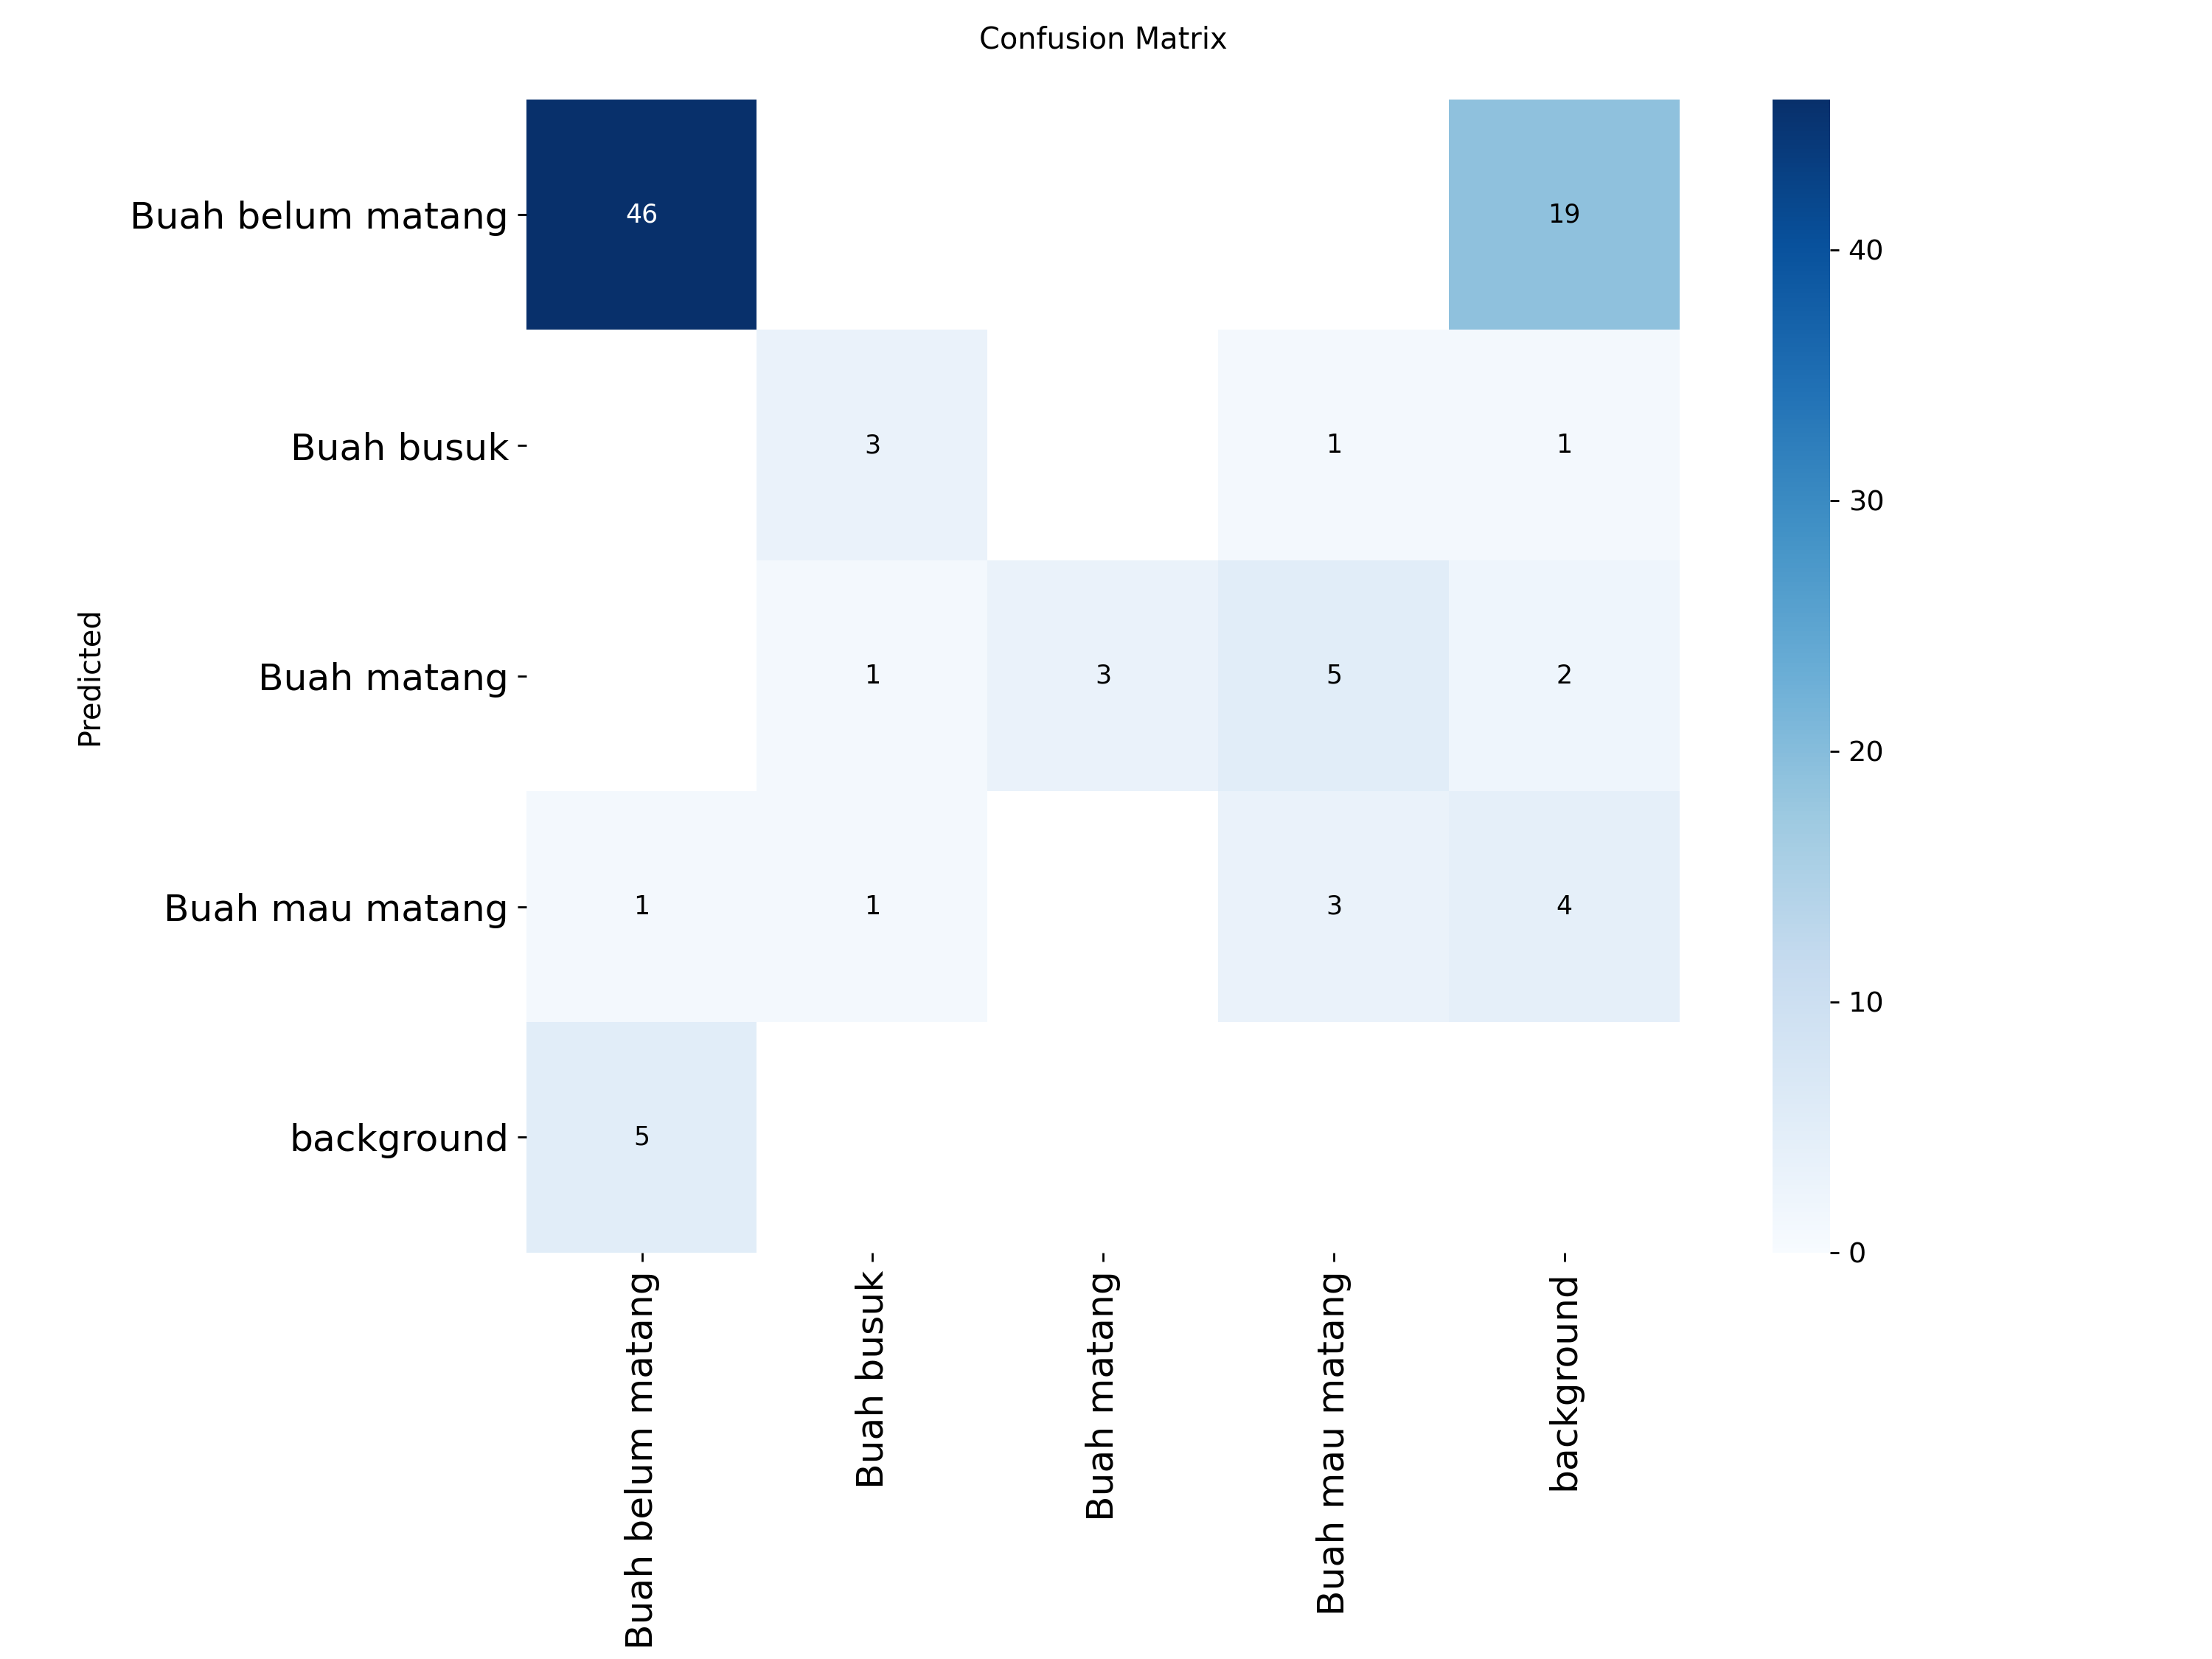


Confusion Matrix (Normalized)


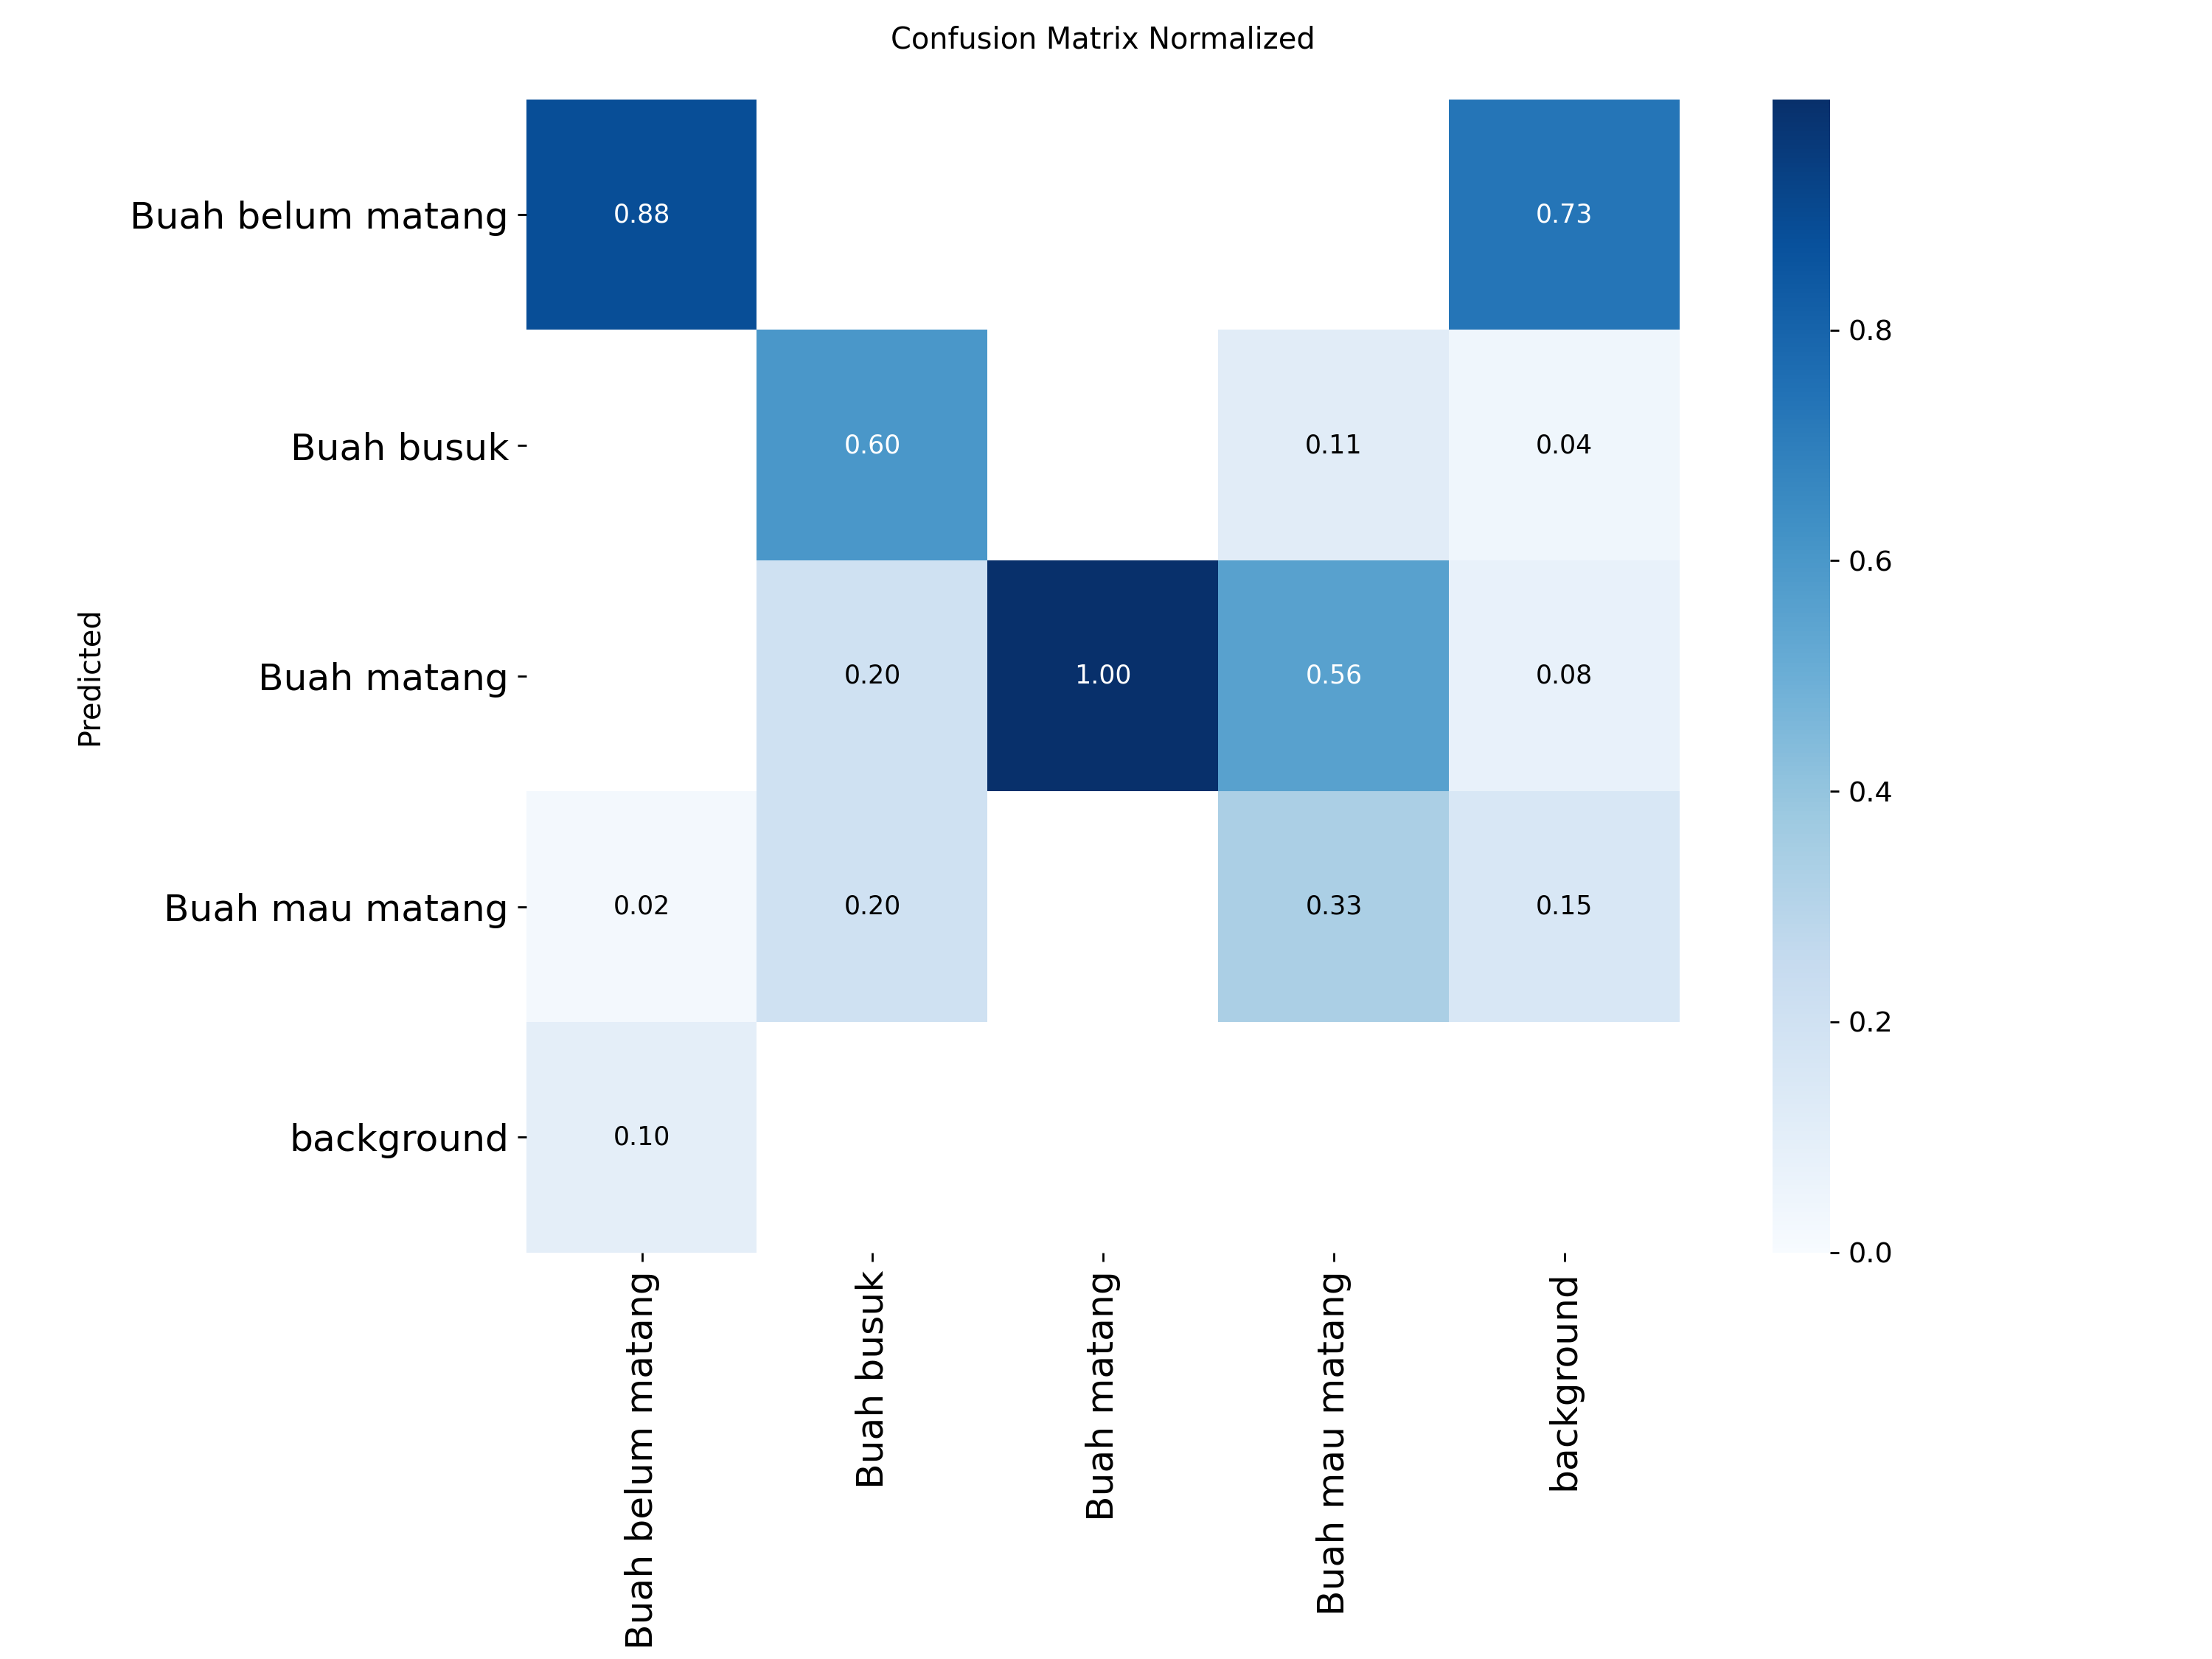

In [ ]:
print("Confusion Matrix (Raw Count)")
display(Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png'))

print("\nConfusion Matrix (Normalized)")
display(Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png'))

In [ ]:
print("Ground Truth Labels (from Test Set)")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch0_labels.jpg'))

print("\nModel's Predictions")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg'))

Ground Truth Labels (from Test Set)



Model's Predictions


In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1rjJhPpmDJXxJ-X3zV2V4lPz5Bx1Ewbo6' -O {HOME}/drone_record_inference_test.mp4

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1rjJhPpmDJXxJ-X3zV2V4lPz5Bx1Ewbo6
From (redirected): https://drive.google.com/uc?export=download&id=1rjJhPpmDJXxJ-X3zV2V4lPz5Bx1Ewbo6&confirm=t&uuid=6e1ed7e4-b7b2-4a41-afec-8000558485f0
To: /content/drone_record_inference_test.mp4
100% 817M/817M [00:11<00:00, 74.1MB/s]


In [ ]:
!yolo task=detect mode=predict \
    model={YOLO_dir}/weights/best.pt \
    conf=0.25 \
    source={HOME}/drone_record_inference_test.mp4 \
    verbose=False \
    save=True

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,428 parameters, 0 gradients, 21.2 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 985, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 535, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/predictor.py", line 244, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
             ^^^
  File "/usr/local/lib/python3.1

In [ ]:
import os

YOLO_dir = f'{HOME}/runs/detect/yolo_raytune_trainable_yolo_4900e65a_2_batch=16,epochs=50,imgsz=640,lr0=0.0011,momentum=0.8679,optimizer=AdamW,patience=10_2025-11-29_10-33-12'

best_model_path = os.path.join(YOLO_dir, 'weights', 'best.pt')

print(f"The selected YOLO_dir is: {YOLO_dir}")
print(f"Path to the best model: {best_model_path}")

The selected YOLO_dir is: /content/runs/detect/yolo_raytune_trainable_yolo_4900e65a_2_batch=16,epochs=50,imgsz=640,lr0=0.0011,momentum=0.8679,optimizer=AdamW,patience=10_2025-11-29_10-33-12
Path to the best model: /content/runs/detect/yolo_raytune_trainable_yolo_4900e65a_2_batch=16,epochs=50,imgsz=640,lr0=0.0011,momentum=0.8679,optimizer=AdamW,patience=10_2025-11-29_10-33-12/weights/best.pt


In [ ]:
# Copy the best.pt model to your /content directory
!cp {best_model_path} {HOME}/best_yolo_model.pt
print(f"Best model copied to: {HOME}/best_yolo_model.pt")

# You can now find 'best_yolo_model.pt' in your /content directory and download it.

Best model copied to: /content/best_yolo_model.pt
